<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "blue">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>Why did you choose this web site?</li>
<li>What is your area of interest from it?</li>
Then add screenshot from the site.(just copy and paste the image in the text-box or insert it from your computer)


This web page consist a lot of information for finances, especially stocks and digital coins. I was always interested in connection of factors in the market and the challenge of building model to predict some of the rises and falls.

The area of interest  is S&P 500

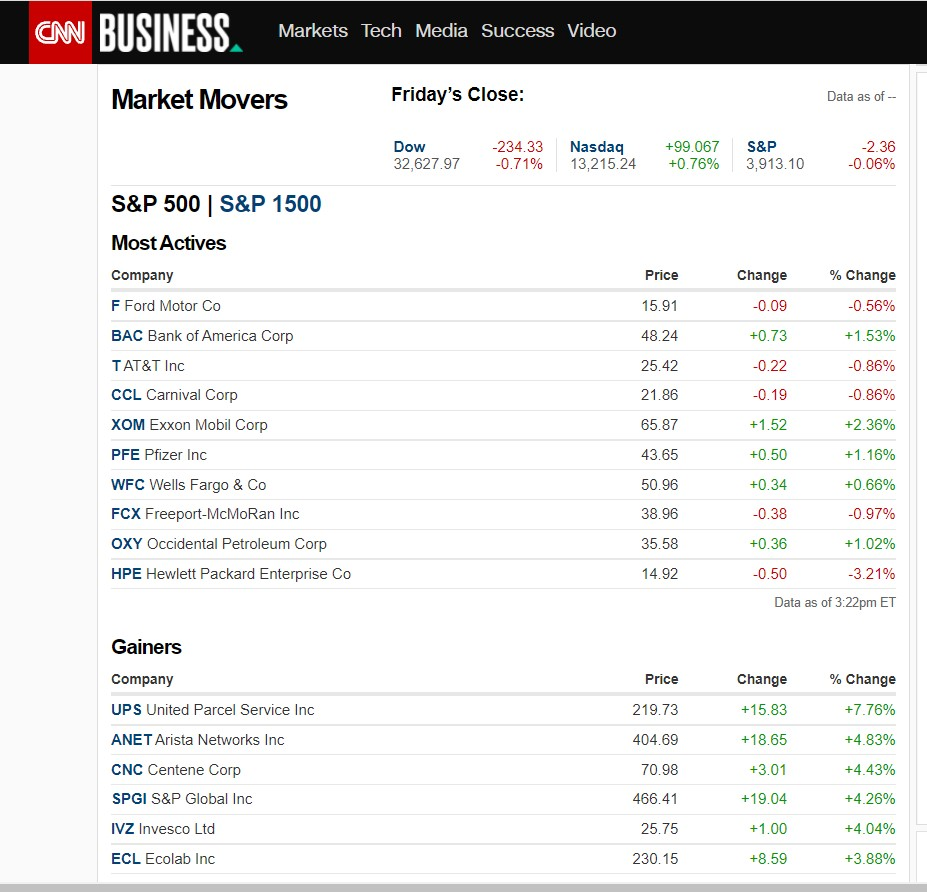

# <font color='Orange'>Requirements specified for Web Scraping</font>

Import all libraries and modules that you are going to use.

In [2]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import pandas as pd
from bs4 import BeautifulSoup
from IPython.display import HTML
import requests
import warnings
#if needed
import numpy as np

# <font color = 'Orange'> Start the scraping by sending HTTP request</font>

 **Fetch a website's content - send request**

In [3]:
#add your code
requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")
web_page_url = 'https://money.cnn.com/data/hotstocks/index.html'
response = requests.get(web_page_url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.


If your webpage is responding with 400, then try again or change it with another one having similar content.

In [15]:
#add your code
response
raw_html = response.text
if response.status_code == 200:
  print("Everything is set.")
else:
  print("Error with request")

 


#Testing other functions of response object
#print(response.headers)
#print(response.raise_for_status)
#print(response.status_code)

Everything is set.
200


# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [ ]:
#add your code
soup = BeautifulSoup(raw_html, 'html.parser')


**Print the HTML code that you get**

In [17]:
#add your code
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<html>
 <head>
  <meta content="IE=Edge" http-equiv="x-ua-compatible"/>
  <meta content="IE=Edge" http-equiv="x-ua-compatible"/>
  <title>
   Hot Stocks - Stock Market Movers - CNNMoney
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Hot stocks that are moving U.S. stock market for the day: The top companies and stocks on the Dow Jones Industrial Average, Nasdaq Composite and the S&amp;P 500." name="description"/>
  <meta content="stock price, stock quote, quote result, quote, quote summary, chart, technical chart, price history, news headlines, financials, EPS, market cap, P/E, analyst rating, income statement, balance sheet, cash flow" name="keywords"/>
  <link href="https://money.cnn.com/data/hotstocks/" rel="canonical"/>
  <link href="https://i.cdn.turner.com/money/.e/ssi/css/2.0/pkg/wsod.datapages/1663.css" rel="stylesheet" type="text/css">
   <script src="https://z.cd

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

`add your attributes here for building the dataset`

Company name, Stock price, Change, Percent change

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [19]:
#add your code
#Select all spans in <td> elements. All atributtes are written in span
all_elements = soup.select('td span')
all_elements

[<span title="Ford Motor Co">Ford Motor Co</span>,
 <span stream="last_104092" streamfeed="Ford Motor Co">16.87</span>,
 <span stream="change_104092" streamfeed="Ford Motor Co"><span class="posData">+1.36</span></span>,
 <span class="posData">+1.36</span>,
 <span stream="changePct_104092" streamfeed="Ford Motor Co"><span class="posData">+8.77%</span></span>,
 <span class="posData">+8.77%</span>,
 <span title="AT&amp;T Inc">AT&amp;T Inc</span>,
 <span stream="last_248333" streamfeed="AT&amp;T Inc">25.55</span>,
 <span stream="change_248333" streamfeed="AT&amp;T Inc"><span class="posData">+0.49</span></span>,
 <span class="posData">+0.49</span>,
 <span stream="changePct_248333" streamfeed="AT&amp;T Inc"><span class="posData">+1.96%</span></span>,
 <span class="posData">+1.96%</span>,
 <span title="Bank of America Corp">Bank of America Corp</span>,
 <span stream="last_57009" streamfeed="Bank of America Corp">47.72</span>,
 <span stream="change_57009" streamfeed="Bank of America Corp"><spa

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#add your code

#First wanted to work with dictionaries because of O(1) complexity and 
#the completеness of the information in one place --> 'Ford Motor Co': [15.8, -0.2, -1.22]
map = dict()
for i in range(len(all_elements)):
  string = str(all_elements[i])

  #only companies' names tags have attr title
  #Create new entry for the company
  if "title" in string:
    map[all_elements[i].text] = []

  #only prices have tags with attr stream and values 'last_xxxxx'
  if "last_" in string:
    map[all_elements[i-1].text].append(float(all_elements[i].text))

  #only change have tags with attr and values stream="change_xxxxx"
  if "change_" in string:
    map[all_elements[i-2].text].append(float(all_elements[i].text))
    
  #only change with percents have tags with attr and values stream="changePct_xxxxx"
  if "changePct_" in string:
    percent = float(all_elements[i].text[0:len(all_elements[i].text)-1])
    map[all_elements[i-4].text].append(percent)

print(map)


{'Ford Motor Co': [15.8, -0.2, -1.22], 'AT&T Inc': [25.44, -0.21, -0.8], 'Bank of America Corp': [48.15, 0.64, 1.34], 'Carnival Corp': [21.71, -0.34, -1.53], 'Exxon Mobil Corp': [65.34, 0.98, 1.53], 'Hewlett Packard Enterprise Co': [14.81, -0.6, -3.89], 'Freeport-McMoRan Inc': [38.77, -0.57, -1.45], 'Pfizer Inc': [43.39, 0.24, 0.56], 'Citigroup Inc': [70.97, 0.14, 0.2], 'Occidental Petroleum Corp': [35.41, 0.19, 0.54], 'United Parcel Service Inc': [218.67, 14.77, 7.24], 'Arista Networks Inc': [404.58, 18.54, 4.8], 'S&P Global Inc': [468.34, 20.97, 4.69], 'IHS Markit Ltd': [129.27, 5.34, 4.31], 'Invesco Ltd': [25.7, 0.95, 3.82], 'Ecolab Inc': [229.72, 8.16, 3.68], 'Baker Hughes Co': [25.98, 0.82, 3.26], 'Centene Corp': [69.87, 1.9, 2.8], 'Las Vegas Sands Corp': [38.99, 1.0, 2.63], 'Ball Corp': [89.5, 2.02, 2.3], 'Lockheed Martin Corp': [327.21, -49.12, -13.05], 'Corning Inc': [36.29, -2.32, -6.01], 'L3harris Technologies Inc': [232.83, -11.44, -4.68], 'Universal Health Services Inc': [1

**Create lists with the extracted data from the html elements that you selected**

In [20]:
#add your code
#Another way with lists:
names = []
prices = []
changes = []
changes_Per = []
for i in range(len(all_elements)):
  string = str(all_elements[i])

  #only companies name tags have attr title
  if "title" in string:
    names.append(all_elements[i].text)

  #only prices have tags with attr stream and values 'last_xxxxx'
  if "last_" in string:
    prices.append(all_elements[i].text)

  #only change have tags with attr and values stream="change_xxxxx"
  if "change_" in string:
    changes.append(float(all_elements[i].text))

  #only change with percents have tags with attr and values stream="changePct_xxxxx"
  if "changePct_" in string:
    percent = float(all_elements[i].text[:-1])
    changes_Per.append(percent)



[8.77,
 1.96,
 1.43,
 4.85,
 0.85,
 -0.26,
 1.8,
 1.0,
 -5.33,
 0.42,
 9.32,
 8.77,
 5.5,
 5.23,
 4.85,
 4.74,
 4.18,
 3.84,
 3.24,
 3.23,
 -7.45,
 -5.33,
 -5.05,
 -5.01,
 -3.55,
 -2.89,
 -2.83,
 -2.6,
 -2.48,
 -2.38]

**Print all lists that are containing the elements**

In [ ]:
#add your code
print(names)
print(prices)
print(changes)
print(changes_Per)

['Ford Motor Co', 'AT&T Inc', 'Bank of America Corp', 'Carnival Corp', 'Exxon Mobil Corp', 'Hewlett Packard Enterprise Co', 'Freeport-McMoRan Inc', 'Pfizer Inc', 'Citigroup Inc', 'Occidental Petroleum Corp', 'United Parcel Service Inc', 'Arista Networks Inc', 'S&P Global Inc', 'IHS Markit Ltd', 'Invesco Ltd', 'Ecolab Inc', 'Baker Hughes Co', 'Centene Corp', 'Las Vegas Sands Corp', 'Ball Corp', 'Lockheed Martin Corp', 'Corning Inc', 'L3harris Technologies Inc', 'Universal Health Services Inc', 'Huntington Ingalls Industries Inc', 'Hewlett Packard Enterprise Co', 'Pultegroup Inc', 'Borgwarner Inc', 'Brown & Brown Inc', 'NORTHROP GRUMMAN CORP']
['15.80', '25.44', '48.15', '21.71', '65.34', '14.81', '38.77', '43.39', '70.97', '35.41', '218.67', '404.58', '468.34', '129.27', '25.70', '229.72', '25.98', '69.87', '38.99', '89.50', '327.21', '36.29', '232.83', '127.55', '203.74', '14.81', '48.03', '43.98', '64.30', '394.10']
[-0.2, -0.21, 0.64, -0.34, 0.98, -0.6, -0.57, 0.24, 0.14, 0.19, 14.77

**Check if all lists are the same size**

In [22]:
#add your code
if len(names) == len(prices) == len(changes) == len(changes_Per):
  print("Same length of all lists")
else:
  print("Something went wrong.")

Same length of all lists


# <font color='Orange'>Create a Pandas DataFrame</font>

**Create the DataFrame from the lists you get and name your *Columns***

In [23]:
matrix = []
for i in range(0, len(names)):
    matrix.append([names[i],prices[i],changes[i],changes_Per[i]])


df_new = pd.DataFrame(np.array(matrix),columns=['Company name','Stock price','Change','Change Percent'])

**Print the dataset you obtain**

In [24]:
#add your code
df_new

,Company name,Stock price,Change,Change Percent
0,Ford Motor Co,16.87,1.36,8.77
1,AT&T Inc,25.55,0.49,1.96
2,Bank of America Corp,47.72,0.68,1.43
3,Merck & Co Inc,85.49,3.95,4.85
4,Carnival Corp,21.82,0.18,0.85
5,Twitter Inc,54.67,-0.14,-0.26
6,Wells Fargo & Co,50.95,0.9,1.8
7,General Motors Co,54.80,0.54,1.0
8,Altria Group Inc,44.97,-2.53,-5.33
9,Pfizer Inc,43.15,0.18,0.42


# <font color = 'Green'>Advanced part</font>

<font color = 'blue'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font>
Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.

Your task is to extract data by sending a request using Selenium on more complicated pages with Forms or Javascript. 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/


In [25]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.baeldung.com/")
print(wd.page_source)  # results
# divs = wd.find_elements_by_css_selector('div')

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InR

<html class="no-js" lang="en-US"><!--<![endif]--><head>

<title>Please Wait... | Cloudflare</title>
  
<meta name="captcha-bypass" id="captcha-bypass">
<meta charset="UTF-8">
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">
<meta name="robots" content="noindex, nofollow">
<meta name="viewport" content="width=device-width,initial-scale=1">
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection">
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-->
<style type="text/css">body{margin:0;padding:0}</style>


<!--[if gte IE 10]><!-->
<script>
  if (!navigator.cookieEnabled) {
    window.addEventListener('DOMContentLoaded', function () {
      var cookieEl = document.getElementById('cookie-alert');
      cookieEl.style.display = 'block';
    })

## <font color = 'Green'>Extra task 2: Scrape some Google site</font>

Your task is to get data from some of the Google sites. For example, get user comments and rating for applications on Google Play (https://play.google.com/store/apps/category/EDUCATION), or scrape the google search results for example https://www.google.com/search?q=finki.

In [36]:
wd.get("https://play.google.com/store/apps/details?id=org.khanacademy.android")
#print(wd.page_source)
comments_elements = (wd.find_elements_by_class_name('UD7Dzf'))
comments_text = []
for _ in comments_elements:
  comments_text.append(_.text)
comments_text

["The app is great but There is a question in class 6 maths about Steve's triangle it has 5 cm on all sides and all angles are acute. It asks wht type of triangle it is (Acute and Equilateral) but there isn't an option for Equilateral only Isocrles and Scalene are there. Please fix this.",
 'I like this app I was in special Ed growing up and when I decided 8 years ago that I wanted to get my GED my teacher told us to use Khan academy. I have now decided not to get my GED because I will never be able to pass it. But I am in the process to better myself and this app is helping me. I have ...\nFull Review',
 'Helpful. But too slow and too many glitches on the mobile app.',
 "Won't save progress, had to force close and reopen several times in first hour."]